In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 最值归一化 Normalization

In [2]:
x = np.random.randint(0, 100, size=100) # 生成数字在0到100间，共100个的随机向量
x

array([70, 63, 49, 18, 77, 63, 40, 48, 48, 55, 86, 85, 39, 99, 43, 63, 60,
        4, 68, 24, 41, 72,  0, 61, 54, 14, 43, 59, 18, 86, 26, 35, 64,  2,
        9, 59, 51, 32, 47, 83, 57, 31, 91, 63, 60, 51, 10, 99, 97, 98, 19,
       99, 74, 45, 80,  9, 12, 15, 12, 84, 71, 46, 24, 77, 32, 39, 93, 82,
       73, 10, 19, 24, 54, 97, 77, 36,  2,  1, 24,  4,  8, 37, 12, 84, 82,
       13, 67, 80, 30, 14, 90,  1, 12, 51, 81, 95,  5, 78, 63, 61])

In [3]:
(x-np.min(x))/ (np.max(x) - np.min(x))

array([0.70707071, 0.63636364, 0.49494949, 0.18181818, 0.77777778,
       0.63636364, 0.4040404 , 0.48484848, 0.48484848, 0.55555556,
       0.86868687, 0.85858586, 0.39393939, 1.        , 0.43434343,
       0.63636364, 0.60606061, 0.04040404, 0.68686869, 0.24242424,
       0.41414141, 0.72727273, 0.        , 0.61616162, 0.54545455,
       0.14141414, 0.43434343, 0.5959596 , 0.18181818, 0.86868687,
       0.26262626, 0.35353535, 0.64646465, 0.02020202, 0.09090909,
       0.5959596 , 0.51515152, 0.32323232, 0.47474747, 0.83838384,
       0.57575758, 0.31313131, 0.91919192, 0.63636364, 0.60606061,
       0.51515152, 0.1010101 , 1.        , 0.97979798, 0.98989899,
       0.19191919, 1.        , 0.74747475, 0.45454545, 0.80808081,
       0.09090909, 0.12121212, 0.15151515, 0.12121212, 0.84848485,
       0.71717172, 0.46464646, 0.24242424, 0.77777778, 0.32323232,
       0.39393939, 0.93939394, 0.82828283, 0.73737374, 0.1010101 ,
       0.19191919, 0.24242424, 0.54545455, 0.97979798, 0.77777

In [4]:
X = np.random.randint(0, 100, (50,2))

In [5]:
X[:5,:]

array([[96, 56],
       [61, 84],
       [32, 36],
       [41, 88],
       [81, 42]])

In [6]:
X = np.array(X, dtype=float) # 因为稍后做除法会得到小数，而X中只能存一种类型(已指定是int型)
#因此这里需要做一个类型的强制转换
X[:5,:]

array([[96., 56.],
       [61., 84.],
       [32., 36.],
       [41., 88.],
       [81., 42.]])

In [7]:
# 第1列 对应第一个特征
X[:, 0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

In [8]:
# 2列， 第二个特征
X[:, 1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

小贴士：如果有多个特征的话，则可以写一个循环来完成此过程

In [9]:
X[:5,:]

array([[0.97802198, 0.56565657],
       [0.59340659, 0.84848485],
       [0.27472527, 0.36363636],
       [0.37362637, 0.88888889],
       [0.81318681, 0.42424242]])

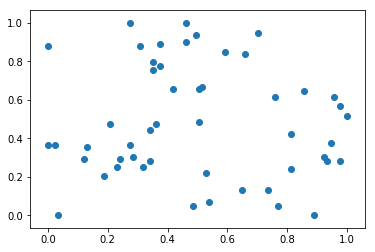

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [11]:
np.mean(X[:,0]) # 均值

0.5

In [12]:
np.std(X[:,0]) # 方差

0.2888688908183066

In [13]:
np.mean(X[:,1])

0.48323232323232324

In [14]:
np.std(X[:,1])

0.2898223247094851

### 均值方差归一化 Standardization

In [15]:
X2 = np.random.randint(0, 100, (50,2))

In [16]:
X2 = np.array(X2, dtype=float)

In [17]:
X2[:,0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:,0])

In [18]:
X2[:,1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:,1])

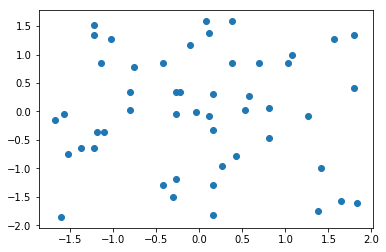

In [19]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

可发现，用此方法，我们并不能保证所有取值都在0到1之间。<br>
其本质将所有数据的中心值即均值放在了0的位置，而其分布的浮度即方差则放在了1的位置。因此避免了极端值的情况。

In [20]:
np.mean(X2[:,0]) # 相当于是0

8.881784197001253e-17

In [21]:
np.std(X2[:,0]) # 相当于1

1.0000000000000002

In [22]:
np.mean(X2[:,1])

-6.120104423246176e-17

In [23]:
np.std(X2[:,1])

1.0

### 对测试数据集归一化

##### 测试数据集如何进行归一化呢？ <br>
对测试数据集求均值和方差然后归一化测试数据集再送给模型计算吗？<br>
答案是不对的。<br><br>
应使用训练数据集的均值和方差来对训练数据集做归一化的操作。<br>
因为测试数据集是模拟真实环境，且真实环境很有可能无法得到所有测试数据的均值和方差。且对数据的归一化也是算法的一部分。<br>
(x_test - mean_train) / std_train

因此需要保存训练数据集得到的均值和方差。

### sklearn 中的 Scalar

In [24]:
import numpy as np
from sklearn import datasets

In [25]:
iris = datasets.load_iris()

In [26]:
X = iris.data
y = iris.target

In [27]:
X[:5,:] # 未进行归一化处理

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)

### scikit-learn中的StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
standardScaler = StandardScaler()

In [31]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
standardScaler.mean_ # 四个特征各个的均值

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [33]:
standardScaler.scale_ # 方差（标准差）: 描述数据分布范围

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [34]:
X_train = standardScaler.transform(X_train)
X_train[:5]

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ]])

In [35]:
X_test_standard = standardScaler.transform(X_test)
X_test_standard[:5]

array([[-0.28902506, -0.18717298,  0.44858475,  0.43859746],
       [-0.04217092, -0.64092567,  0.78892303,  1.63175932],
       [-1.0295875 , -1.77530738, -0.2320918 , -0.22427024],
       [-0.04217092, -0.86780201,  0.78892303,  0.96889162],
       [-1.52329579,  0.03970336, -1.25310662, -1.28485856]])

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [38]:
knn_clf.fit(X_train, y_train) # 用归一化后的测试数据集来进行模型训练

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
knn_clf.score(X_test_standard, y_test) # 归一化训练数据集后，测试数据集也必须归一化

1.0

### 使用我们自己的standardScaler

In [40]:
from model_selection_tools.preprocessing import StandardScaler

In [46]:
standardScaler = StandardScaler()

In [47]:
standardScaler.fit(X_train)

In [48]:
standardScaler.mean_

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [49]:
standardScaler.scale_

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [50]:
X_train = standardScaler.transform(X_train)

In [51]:
X_test = standardScaler.transform(X_test)

In [52]:
from model_selection_tools.KNN_enc import KNNClassifier

In [53]:
my_knn_clf = KNNClassifier(k=3)

In [54]:
my_knn_clf.fit(X_train,y_train)

KNN(K=3)

In [55]:
my_knn_clf.score(X_test, y_test)

1.0